Checkpoint 7 - Decision Tree & Random Forest

We are going to predict once again if a passenger on the Titanic is going to survive or not using decision trees and random forests this time: 

1. Read your Titanic dataset as usual: A training set and Testing set Apply decision tree. 

2. Plot your decision tree and try to read the tree branches and conclude a prediction manually.

3. Change the decision tree parameters(change at least two parameters), 

4. Calculate the new accuracy and compare it with the previous results. 

5. Use random forest then change the number of estimators

6. Calculate the new accuracy and compare it with the previous result.

Let's start working on it step by step. 

#Step 1: Read your Titanic dataset as usual: A training set and Testing set Apply decision tree. 

In [285]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [286]:
df = pd.read_csv("titanic-passengers.csv", sep=';')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,343,No,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,NaN,S
1,76,No,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,F G73,S
2,641,No,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,NaN,S
3,568,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,NaN,S
4,672,No,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,B71,S


In [287]:
df.Age = df.Age.fillna(df.Age.median())
num_survived = {'Survived':{'No':0, 'Yes':1}}
df.replace(num_survived, inplace = True)
num_sex = {'Sex':{'male':0, 'female':1}}
df.replace(num_sex, inplace = True)    
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,343,0,2,"Collander, Mr. Erik Gustaf",0,28.0,0,0,248740,13.0000,NaN,S
1,76,0,3,"Moen, Mr. Sigurd Hansen",0,25.0,0,0,348123,7.6500,F G73,S
2,641,0,3,"Jensen, Mr. Hans Peder",0,20.0,0,0,350050,7.8542,NaN,S
3,568,0,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",1,29.0,0,4,349909,21.0750,NaN,S
4,672,0,1,"Davidson, Mr. Thornton",0,31.0,1,0,F.C. 12750,52.0000,B71,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",1,14.0,1,0,237736,30.0708,NaN,C
887,61,0,3,"Sirayanian, Mr. Orsen",0,22.0,0,0,2669,7.2292,NaN,C
888,535,0,3,"Cacic, Miss. Marija",1,30.0,0,0,315084,8.6625,NaN,S
889,102,0,3,"Petroff, Mr. Pastcho (""Pentcho"")",0,28.0,0,0,349215,7.8958,NaN,S


In [288]:

df.drop('Cabin', axis=1, inplace=True)
df['Embarked'].fillna('S', inplace = True)
df.drop('PassengerId', axis=1, inplace=True)
df['Title']=0
df['Title']=df.Name.str.extract('([A-Za-z]+)\.')
df['Title'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col',
                         'Rev','Capt','Sir','Don'],['Miss','Miss','Mrs','Officer','Officer','Royalty','Royalty','Royalty','Officer','Officer','Officer','Royalty','Royalty'],inplace=True)
df.drop('Name', axis=1, inplace=True)
Embarked_one_hot = pd.get_dummies(df['Embarked'])
df = df.join(Embarked_one_hot)
df.drop('Embarked', axis=1, inplace=True)
df.drop('Ticket', axis=1, inplace=True)
for dataset in [df]:
    dataset['Familysize'] = dataset['SibSp'] + dataset['Parch'] +1
df.drop('SibSp', axis=1, inplace=True)
df.drop('Parch', axis=1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    891 non-null    int64  
 1   Pclass      891 non-null    int64  
 2   Sex         891 non-null    int64  
 3   Age         891 non-null    float64
 4   Fare        891 non-null    float64
 5   Title       891 non-null    object 
 6   C           891 non-null    uint8  
 7   Q           891 non-null    uint8  
 8   S           891 non-null    uint8  
 9   Familysize  891 non-null    int64  
dtypes: float64(2), int64(4), object(1), uint8(3)
memory usage: 47.9+ KB


In [289]:
Title_one_hot = pd.get_dummies(df['Title'])
df = df.join(Title_one_hot)
df.drop('Title', axis=1, inplace=True)
df

,Survived,Pclass,Sex,Age,Fare,C,Q,S,Familysize,Master,Miss,Mr,Mrs,Officer,Royalty
0,0,2,0,28.0,13.0000,0,0,1,1,0,0,1,0,0,0
1,0,3,0,25.0,7.6500,0,0,1,1,0,0,1,0,0,0
2,0,3,0,20.0,7.8542,0,0,1,1,0,0,1,0,0,0
3,0,3,1,29.0,21.0750,0,0,1,5,0,0,0,1,0,0
4,0,1,0,31.0,52.0000,0,0,1,2,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,1,2,1,14.0,30.0708,1,0,0,2,0,0,0,1,0,0
887,0,3,0,22.0,7.2292,1,0,0,1,0,0,1,0,0,0
888,0,3,1,30.0,8.6625,0,0,1,1,0,1,0,0,0,0
889,0,3,0,28.0,7.8958,0,0,1,1,0,0,1,0,0,0


In [290]:
from sklearn.model_selection import train_test_split
from sklearn import tree   
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from matplotlib import pyplot as plt
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier 
from sklearn import tree
from sklearn import metrics 

x=df[['Pclass', 'Sex', 'Age', 'Fare', 'C', 'Q', 'S', 'Familysize', 'Master', 'Miss', 'Mr', 'Mrs', 'Officer', 'Royalty']]
y= df["Survived"]

#splitting data
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.20,random_state=10)

#applying tree algorithm
clf = tree.DecisionTreeClassifier()  
clf.fit(x_train, y_train) #fitting our model
y_pred=clf.predict(x_test)  # evaluating our model  
print("score:{}".format(accuracy_score(y_test, y_pred)))


score:0.8100558659217877


#Step 2: Plot your decision tree and try to read the tree branches and conclude a prediction manually.

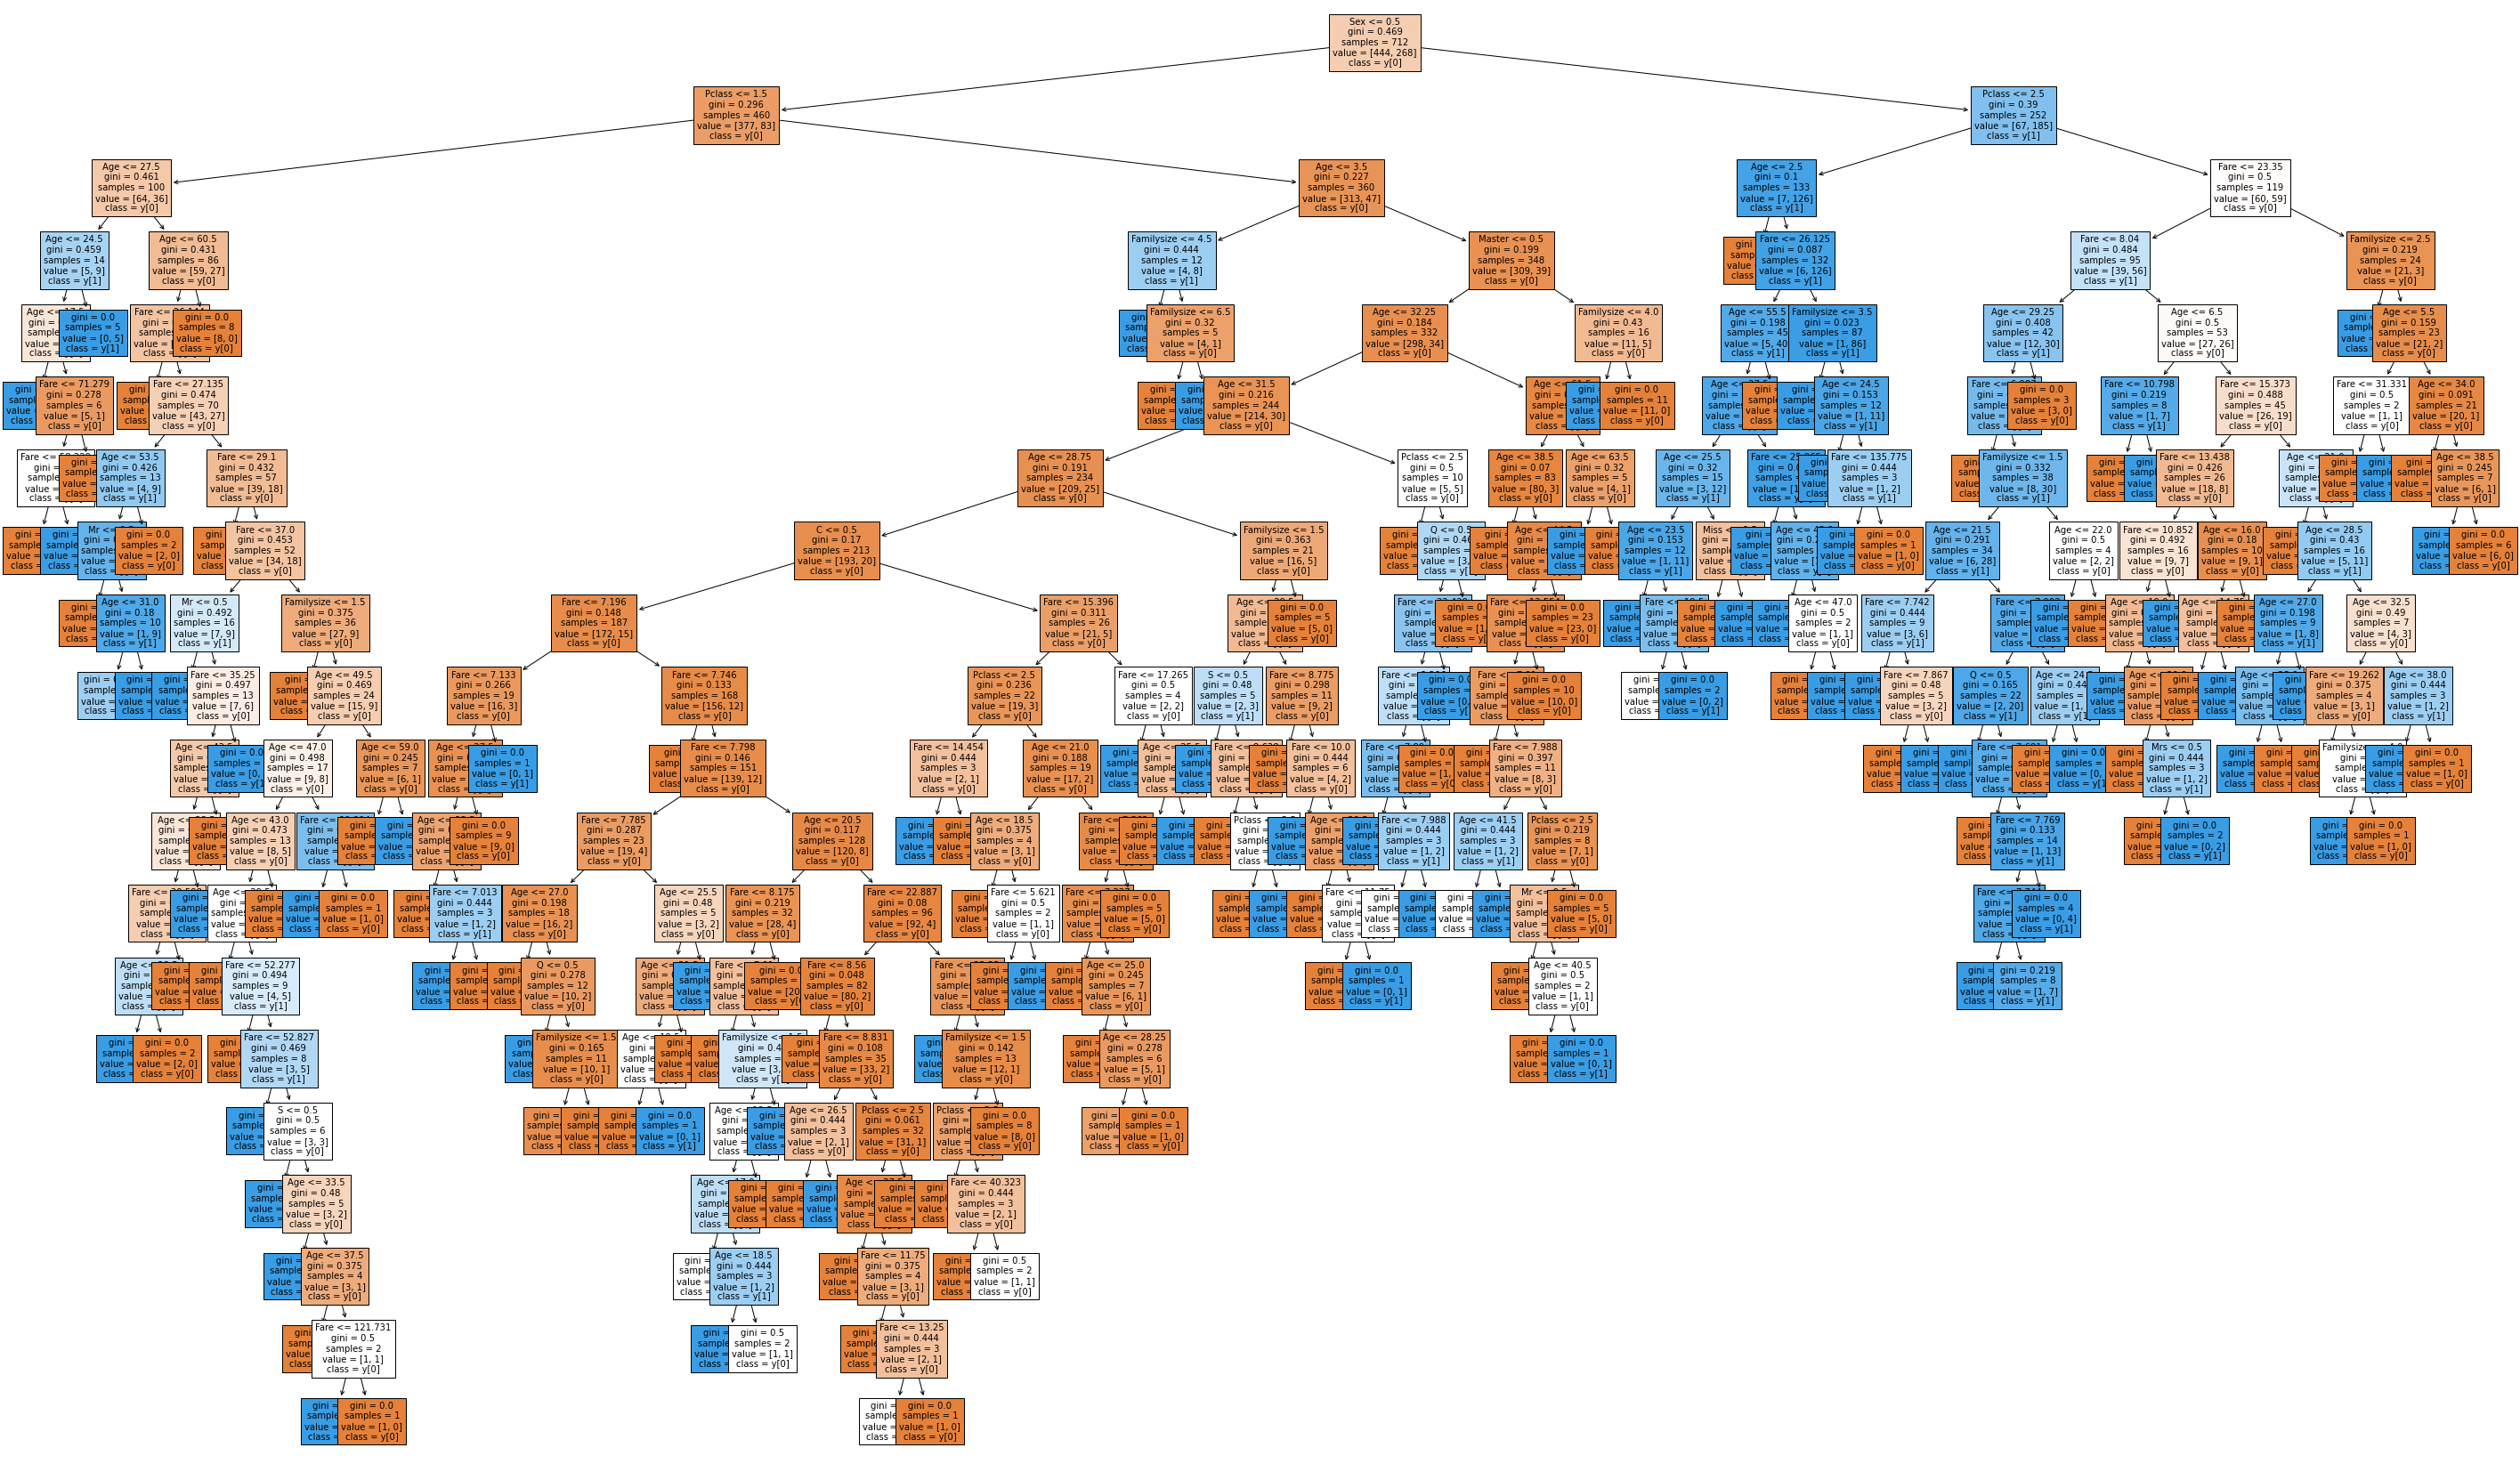

In [291]:
fig, ax = plt.subplots(figsize=(50,30))

out = tree.plot_tree(clf, feature_names = x.columns, class_names = True, fontsize=10, filled=True)

#Reading and Predicting 
#Sex > Pclass > Age > Family Size > Survival 

#Prediction: the sex of the passenger is male and traveling in Pclass 1 aged 3.5 or less is a Master and with a family size less than 4, then the passenger did not survive

#Step 3:  Change the decision tree parameters(change at least two parameters)

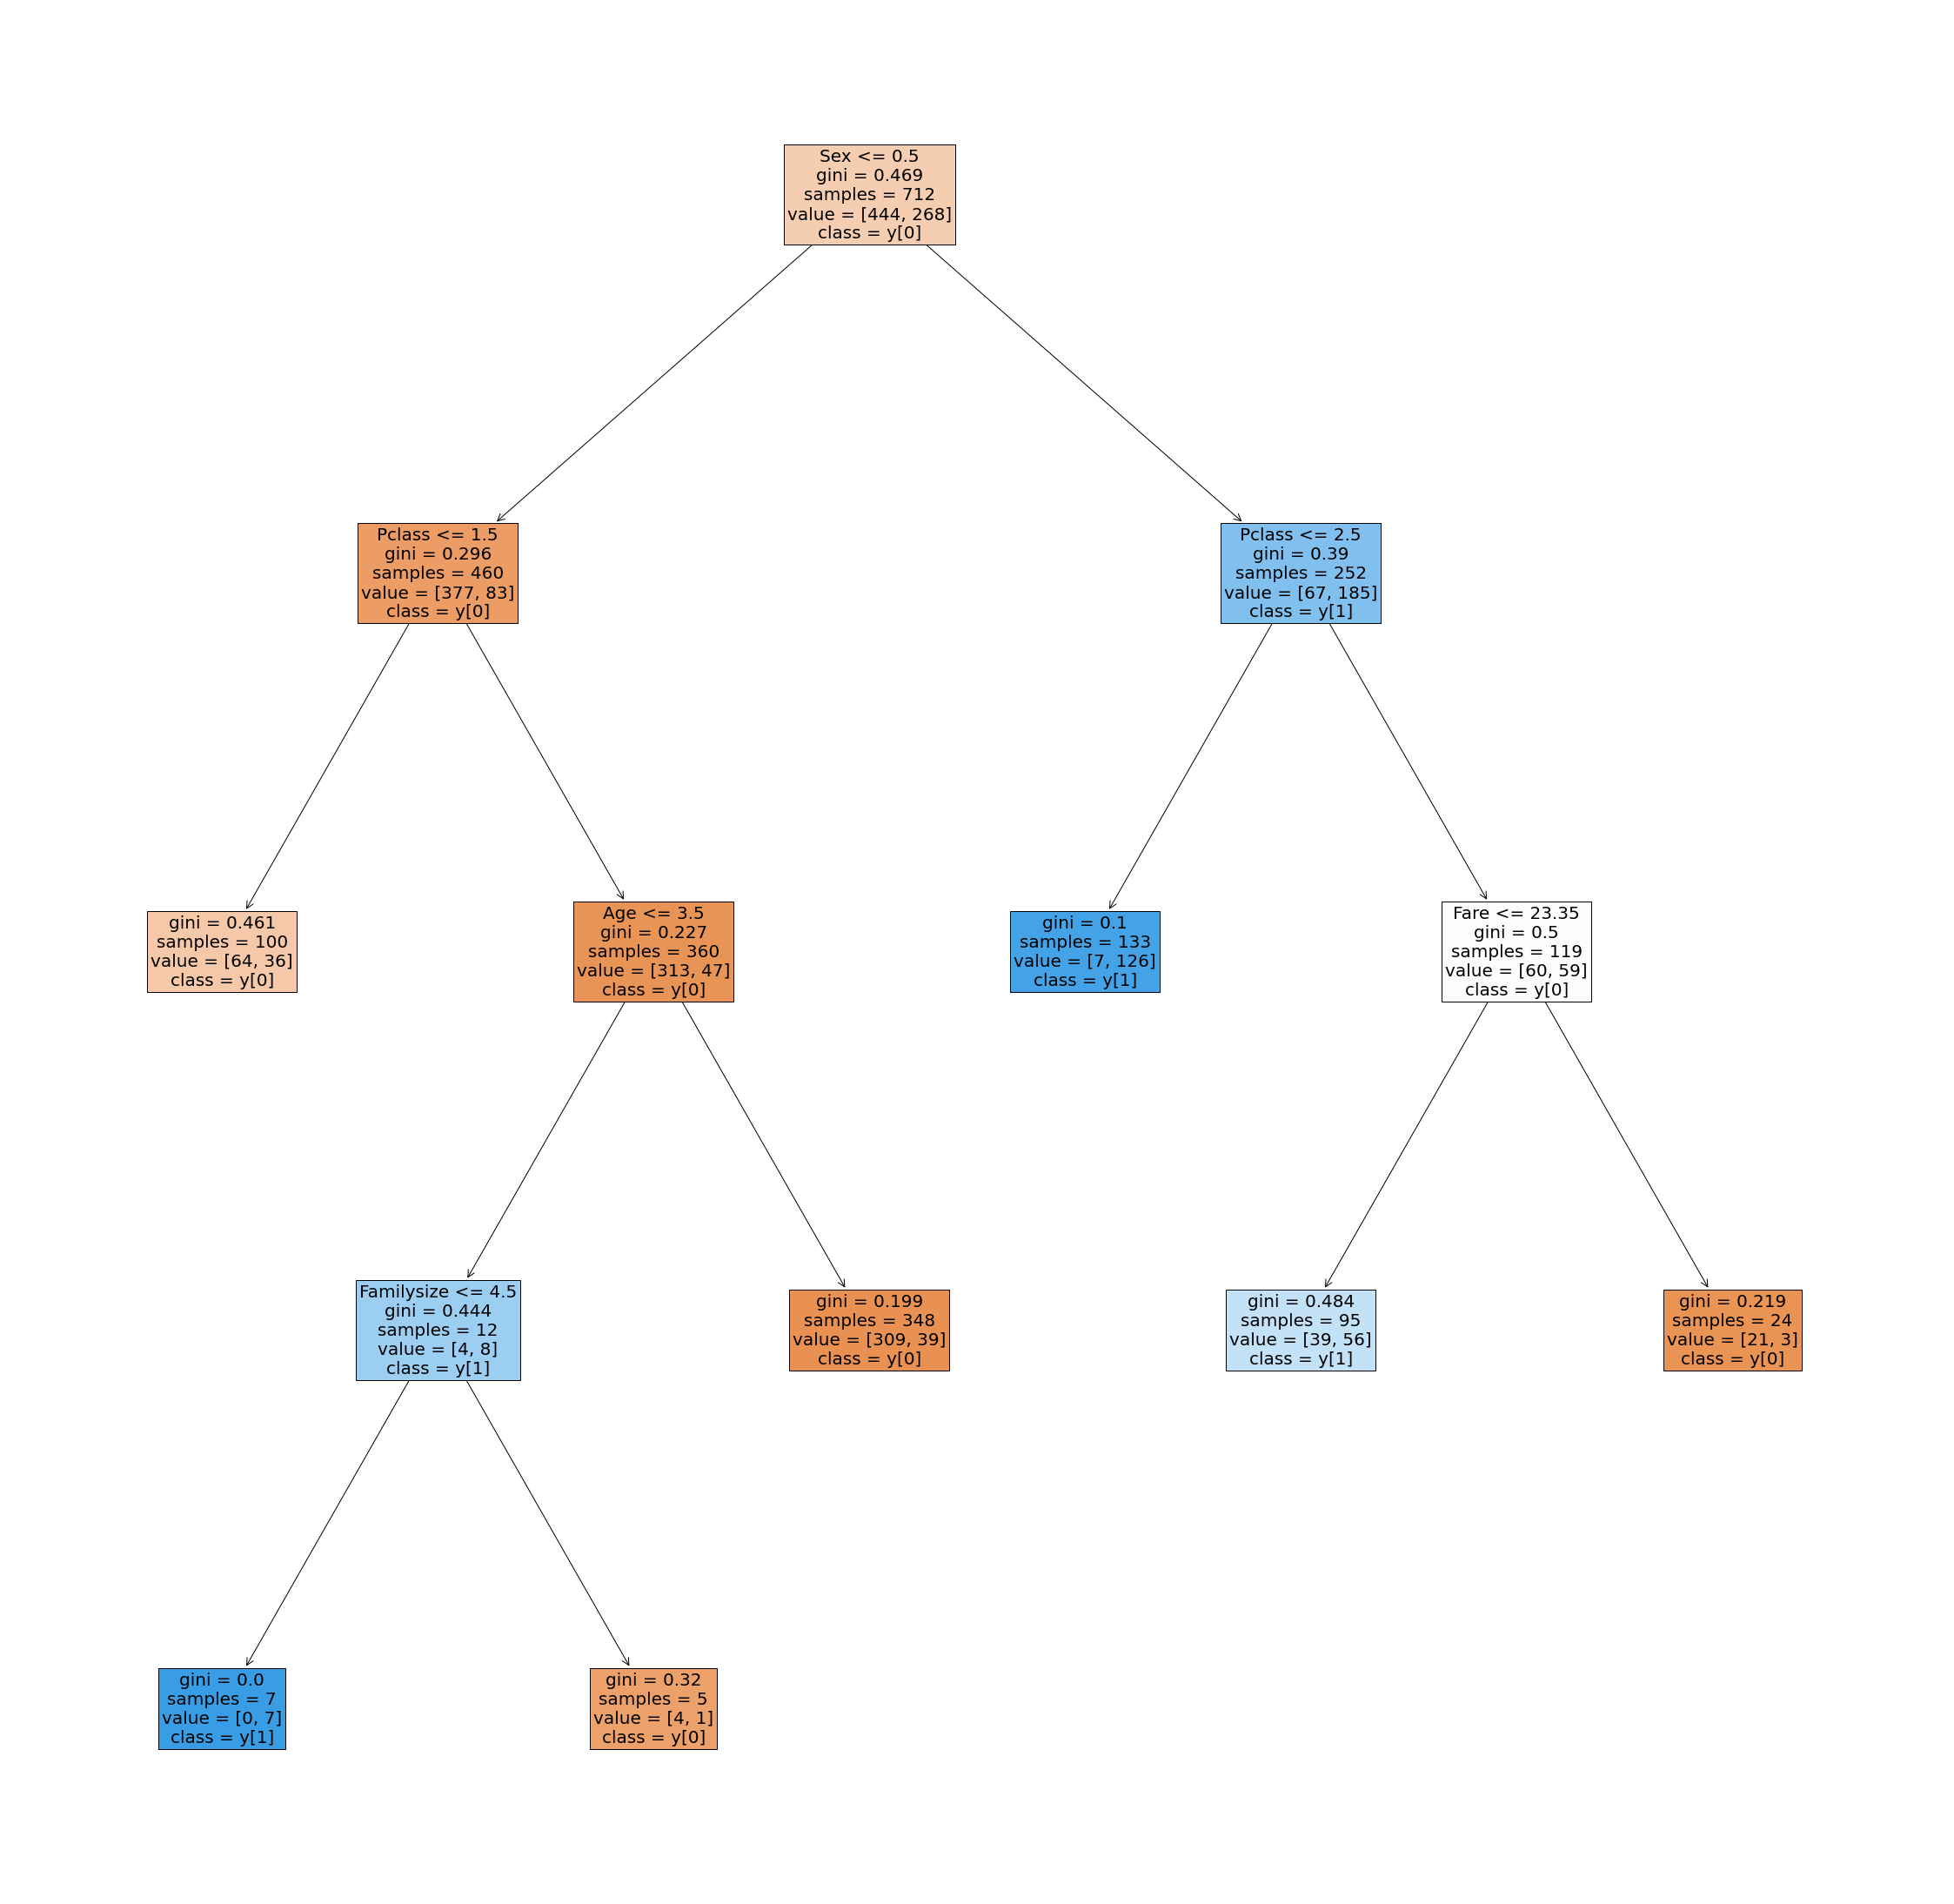

In [292]:
#min_impurity_decrease parameter
clf = tree.DecisionTreeClassifier(min_impurity_decrease=0.005)  
clf.fit(x_train, y_train)
fig, ax = plt.subplots(figsize=(40,40))
out = tree.plot_tree(clf, feature_names = x.columns, class_names = True, fontsize=20, filled=True)

In [293]:
print("score:{}".format(accuracy_score(y_test, y_pred)))

score:0.8100558659217877


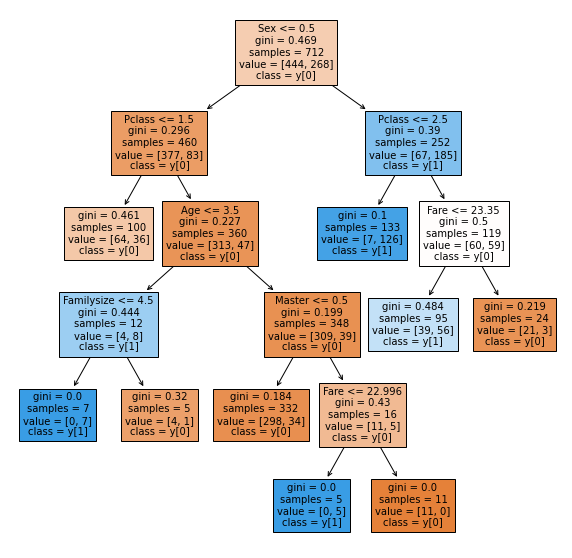

In [294]:
#Complexity parameter used for Minimal Cost-Complexity Pruning parameter

clf = tree.DecisionTreeClassifier(ccp_alpha=0.005)  
clf.fit(x_train, y_train)
fig, ax = plt.subplots(figsize=(10,10))
out = tree.plot_tree(clf, feature_names = x.columns, max_depth=6, class_names = True, fontsize=10, filled=True)


In [295]:
print("score:{}".format(accuracy_score(y_test, y_pred)))

score:0.8100558659217877


#Step 4: Calculate the new accuracy and compare it with the previous results.

Accuracy for min_impurity_decrease parameter is: 0.8100558659217877
Accuraacy for Minimal Cost-Complexity Pruning parameter is: 0.8100558659217877

The Accuracy stayed the same even when the parameters changed. 

Step 5: Use random forest then change the number of estimators

In [296]:
#Random Forest 

from sklearn.ensemble import RandomForestClassifier 
from sklearn import datasets
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier #Importing Random Forest Classifier
from sklearn import metrics  # Importing metrics to test accuracy

x = df[['Pclass', 'Sex', 'Age', 'Fare', 'C', 'Q', 'S', 'Familysize', 'Master', 'Miss', 'Mr', 'Mrs', 'Officer', 'Royalty']] #features

y = df['Survived'] #target 
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size=0.3) #splitting data with test size of 30%
clf=RandomForestClassifier(n_estimators=10) #Creating a random forest with 100 decision trees 
clf.fit(x_train, y_train)  #Training our model
y_pred=clf.predict(x_test)  #testing our model
print("Accuracy:", metrics.accuracy_score(y_test, y_pred)) #Measuring the accuracy of our model

Accuracy: 0.7947761194029851


In [297]:
#Changing Number of Estimators 

x = df[['Pclass', 'Sex', 'Age', 'Fare', 'C', 'Q', 'S', 'Familysize', 'Master', 'Miss', 'Mr', 'Mrs', 'Officer', 'Royalty']] #features

y = df['Survived'] #target 
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size=0.3) #splitting data with test size of 30%
clf=RandomForestClassifier(n_estimators=5) 
clf.fit(x_train, y_train)  #Training our model
y_pred=clf.predict(x_test)  #testing our model
print("Accuracy:", metrics.accuracy_score(y_test, y_pred)) #Measuring the accuracy of our model

Accuracy: 0.7798507462686567


In [298]:
#Changing Number of Estimators 

x = df[['Pclass', 'Sex', 'Age', 'Fare', 'C', 'Q', 'S', 'Familysize', 'Master', 'Miss', 'Mr', 'Mrs', 'Officer', 'Royalty']] #features

y = df['Survived'] #target 
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size=0.3) #splitting data with test size of 30%
clf=RandomForestClassifier(n_estimators=40) 
clf.fit(x_train, y_train)  #Training our model
y_pred=clf.predict(x_test)  #testing our model
print("Accuracy:", metrics.accuracy_score(y_test, y_pred)) #Measuring the accuracy of our model

Accuracy: 0.8059701492537313


In [299]:
#Changing Number of Estimators 

x = df[['Pclass', 'Sex', 'Age', 'Fare', 'C', 'Q', 'S', 'Familysize', 'Master', 'Miss', 'Mr', 'Mrs', 'Officer', 'Royalty']] #features

y = df['Survived'] #target 
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size=0.3) #splitting data with test size of 30%
clf=RandomForestClassifier(n_estimators=60) 
clf.fit(x_train, y_train)  #Training our model
y_pred=clf.predict(x_test)  #testing our model
print("Accuracy:", metrics.accuracy_score(y_test, y_pred)) #Measuring the accuracy of our model

Accuracy: 0.7947761194029851


In [300]:
#Changing Number of Estimators 

x = df[['Pclass', 'Sex', 'Age', 'Fare', 'C', 'Q', 'S', 'Familysize', 'Master', 'Miss', 'Mr', 'Mrs', 'Officer', 'Royalty']] #features

y = df['Survived'] #target 
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size=0.3) #splitting data with test size of 30%
clf=RandomForestClassifier(n_estimators=100) 
clf.fit(x_train, y_train)  #Training our model
y_pred=clf.predict(x_test)  #testing our model
print("Accuracy:", metrics.accuracy_score(y_test, y_pred)) #Measuring the accuracy of our model

Accuracy: 0.8171641791044776


Step 6: Calculate the new accuracy and compare it with the previous result. 

Number of Estimators 10 Accuracy: 0.7947761194029851
Number of Estimators 5 Accuracy: 0.7798507462686567
Number of Estimators 40 Accuracy: 0.8059701492537313
Number of Estimators 60 Accuracy: 0.7947761194029851
Number of Estimators 100 Accuracy: 0.8171641791044776

Overall, when the number of estimators changed, all except one accuracy improved.The best outcome was when the number of estimators was changed to 100. However, I don't see a clear or definite connection between the number of estimators (more/less) and the accuracy (better/worse) as even though the number of estimators were 10 and the accuracy was 0.7947761194029851, it scored the same as the number of estimators as 60. 
